<div dir="rtl" align="center"><h3>ابتدا کتابخانه های مورد نیاز را import میکنیم</h3></div>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt, matplotlib.image as mpimg
#from matplotlib.pyplot import fighure, imshow, axis
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import svm

<div dir="rtl" align="center">
    <h3>در این مرحله داده های دارای برچسب را از فایل csv میخوانیم</h3>
</div>
<div dir="rtl" align="right">
    <h4>این فایل شامل اطلاعات 42هزار تصویر از اعداد تک رقمی است</h4>
    <h4>هر تصویر دارای ابعاد 28 در 28 پیکسل است که به صورت یک آرایه یک بعدی 784 ستونه در فایل train.scv نوشته شده است. ضمنا ستون اول در این فایل برچسب مربوط به آن تصویر می باشد که عدد نوشته شده در تصویر را نشان می دهد</h4>
</div>

In [4]:
dg = pd.read_csv('train.csv')
dg.shape

(42000, 785)

<div dir="rtl" align="center">
    <h3>جداسازی داده های آموزش و صحت سنجی</h3>
</div>
<div dir="rtl" align="right">
    <h4>تابع train_test_split از کتابخانه sklearn وظیفه افراز یک دیتاست برچسب دار به دو دیتاست جهت آموزش و صحت سنجی را برعهده دارد</h4>
    <h4>تابع فوق با استفاده از پارامتر train_size درصدی از دیتاست که باید برای آموزش درنظر گرفته شود را مشخص می نماید. در عبارت زیر 80% از داده ها به آموزش و 20% باقیمانده آنها برای صحت سنجی به کار برده شده است</h4>
</div>

In [9]:
train_img, test_img, train_lbl, test_lbl = train_test_split(dg.iloc[0:5000,1:], dg.iloc[0:5000,:1], train_size=0.8, random_state=0)

<div dir="rtl" align="center">
    <h3>نمایش برخی تصاویر</h3>
</div>
<div dir="rtl" align="right">
    <h4>در این مرحله برای آنکه تصاویر داخل دیتاست را ببینیم، با استفاده از تابع imshow از کتابخانه matplotlib ده تصویر اول دیتاست را نمایش داده ایم. برای آنکه این تصاویر به صورت افقی در کنار یکدیگر نمایش داده شوند، از تابع subplots استفاده کرده ایم</h4>
    <h4>برای آنکه آرایه یک بعدی اطلاعات پیکسل های تصاویر را به تصویر 28 در 28 تبدیل نماییم، از توابع to_numpy و reshape استفاده کرده ایم</h4>
</div>

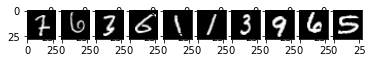

In [27]:
f,ax=plt.subplots(1,10)
for i in range(10):   
    ax[i].imshow(train_img.iloc[i].to_numpy().reshape(28,28), cmap='gray')

plt.show()

<div dir="rtl" align="center">
    <h3>ساخت و آموزش مدل</h3>
</div>
<div dir="rtl" align="right">
    <h4>تابع SVC ماژول svm از کتابخانه sklearn وظیفه classification داده های یک دیتاست را بر عهده دارد. این تابع یک مدل ایجاد می کند که میتوان اطلاعات (در اینجا تصاویر) را به همراه برچسب آنها به تابع fit داده و آموزش مدل را انجام داد</h4>
    <h4>نکته آنکه برای سرعت بخشیدن به آموزش و صحت سنجی مدل، در هنگام Split کردن دیتاست تنها 5000تصویر ابتدایی را با استفاده از iloc انتخاب کردیم. لازم به تذکر است که هرچه تعداد داده های آموزش و صحت سنجی بیشتر باشد، دقت مدل بالاتر خواهد رفت</h4>
    <h5>دقت شود که تابع ravel مقادیر مربوط به برچسب را به صورت یک آرایه یک بعدی (سطری) درمی آورد</h5>
</div>
<hr>
<div dir="rtl" align="center">
    <h3>دقت مدل ایجاد شده کمی بیشتر از 94% است</h3>
</div>

In [11]:
clf = svm.SVC()
clf.fit(train_img, train_lbl.values.ravel())
clf.score(test_img,test_lbl)

0.942

<div dir="rtl" align="center">
    <h3>تست مدل</h3>
</div>
<div dir="rtl" align="right">
    <h4>پس از ایجاد و آموزش مدل، با استفاده از بخشی از دیتاست برچسب دار صحت سنجی مدل را انجام می دهیم و چنانچه مدل ایجاد شده از دقت خوبی برخوردار نباشد، باید برخی پارامترهای آنرا تغییر داده و مجددا فرایند آموزش را انجام دهیم. در نهایت بعد از آنکه دقت مدل به حد مطلوب رسید، میتوانیم با استفاده از متد predict مدل خود را بیازماییم</h4>
    <h4>در این مرحله دیتاست test.csv را لود می کنیم. برای سرعت بیشتر تنها 1000 تصویر ابتدایی را به تابع predict داده ایم تا نتایج سریعتر بدست آیند. چراکه فایل دیتاست test.csv شامل 28هزار تصویر می باشد!</h4>
</div>

In [40]:
test_data=pd.read_csv('test.csv')
results=clf.predict(test_data[0:1000])

<div dir="rtl" align="center">
    <h3>صحت سنجی نتایج</h3>
</div>
<div dir="rtl" align="right">
    <h4>در این مرحله جهت صحت سنجی مدل که روی دیتاست تست اعمال شده است، 10 عدد از برچسب های predict شده را نمایش می دهیم. در سلول زیر برچسب های 105 تا 115 نشان داده شده اند</h4>
</div>

In [48]:
results[105:115]

array([3, 0, 5, 0, 3, 0, 0, 4, 7, 1], dtype=int64)

<div dir="rtl" align="right">
    <h4>سپس تصاویر مرتبط با برچسب های بالا (تصاویر سطرهای 105 تا 115 از دیتاست تست) را در یک ردیف افقی نمایش می دهیم</h4>
    <h5>همانطور که ملاحظه می شود یکی از این تصاویر (تصویر پنجم) اشتباه تشخیص داده شده است [تصویر عدد 8 را نشان می دهد اما مدل عدد 3 را تشخیص داده است]</h5>
</div>

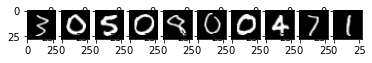

In [44]:
f,ax=plt.subplots(1,10)
ind=0
for i in range(105,115):
    ax[ind].imshow(test_data.iloc[i].to_numpy().reshape(28,28), cmap='gray')
    ind+=1
    #ax[i].title(train_lbl.iloc[i,0])
plt.show()

<div dir="rtl" align="center">
    <h3>درج دیتاست تست در فایل خروجی</h3>
</div>
<div dir="rtl" align="right">
    <h4>در نهایت برای درج دیتاست نهایی در یک فایل خروجی، ابتدا از آرایه یک بعدی برچسب ها (با نام results) که در سلول بالا ساخته شد، یک دیتافریم می سازیم. دیتافریم ساخته شده دارای دو ستون به نام های ImageId و Label است</h4>
</div>

In [50]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)